In [2]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
# 경로를 설정하지 않으면 동작을 안할수 있음
from sklearn.tree import export_graphviz
import graphviz

In [3]:
#데이터를 불러오기
wine = load_wine()

In [5]:
# 데이터프레임 생성
df = pd.DataFrame(data=wine.data, columns= wine.feature_names)
df['target'] = wine.target

In [11]:
# EDA (Exploratory Data Analysis) 탐색적 데이터 분석
print(df.shape)
print(df.describe())
# 총 3가지 와인의 품종이 있음 0, 1, 2
print(df['target'].value_counts())

target
1    71
0    59
2    48
Name: count, dtype: int64


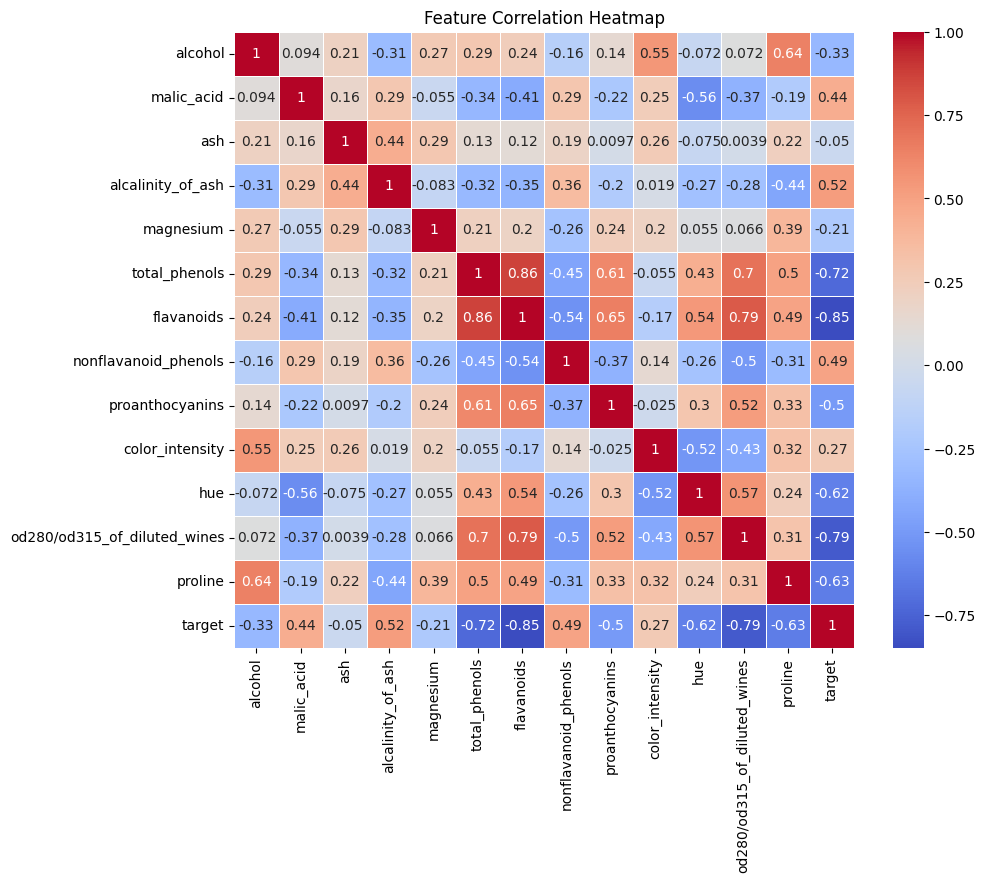

In [13]:
# 특성 간 싱관관계 히트맵
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm', linewidths = 0.5 )
plt.title("Feature Correlation Heatmap")
plt.show()


In [14]:
#모형 학습
# 특성 (Feature)와 타겟(target)의 데이터를 분리
X = df.drop('target', axis=1)
y = df['target']

In [15]:
# 학습데이터와 테스트 데이터로 분리 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [16]:
# Decision Tree 모델 생성 및 학습
clf = DecisionTreeClassifier(criterion= 'entropy')
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
#테스트를 위한 품종 분류
y_pred = clf.predict(X_test)

In [21]:
# 정확도 계산 및 분류 리포트를 출력
accuracy = accuracy_score(y_test, y_pred)
print("\n Accuracy:", accuracy)
print("\n Classification Report", classification_report(y_test, y_pred))


 Accuracy: 0.9166666666666666

 Classification Report               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



In [22]:
#의사결정나무를 시각화
dot_data = export_graphviz(clf, out_file = None)
#Graphviz 객체 생성
graph = graphviz.Source(dot_data)
#저장 및 표시
graph.render("basic_classifier", view=True)


'basic_classifier.pdf'